# ROC curve

0.8030370923574807
0.8422537548751141
0.818521284540702
0.8245290847232596
0.826371255497469


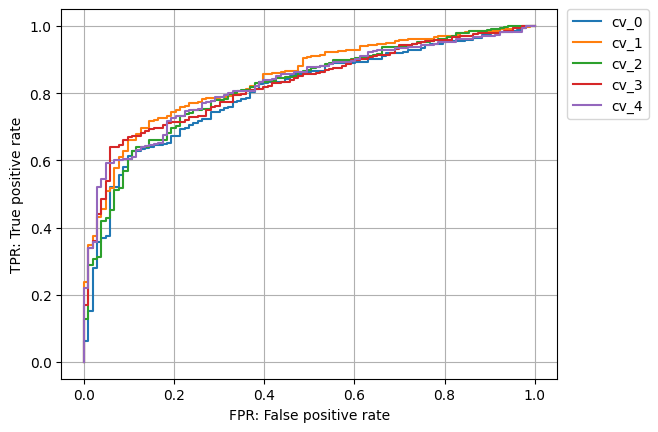

In [1]:
import pandas as pd
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import numpy as np
classifier = "classifier.ResNet152.inference.simple"
for i in range(5):
    number = str(i)
    name = "classifier.ResNet152.cv_"+number+".inference.simple"
    path = "../../preds/"+name+".csv"
    df = pd.read_csv(path)

    df_processed = df.filter(items=['ID','RP'])
    df_processed = df_processed.sort_values('ID')

    df_answer = pd.read_csv("../../storage/data_Labels.csv")
    df_answer_processed = df_answer.filter(items=['ID','RP'])
    df_answer_processed = df_answer_processed.sort_values('ID')

    df_probability = pd.merge(df_answer_processed,df_processed, how='left',on =  "ID")
    df_probability.to_csv("auc_"+name+".csv")

    df_list = df_processed["RP"].values.tolist()
    df_answer_list = df_answer_processed["RP"].values.tolist()
    roc = roc_curve(df_answer_list,df_list)
    fpr, tpr, thresholds = roc
    print(roc_auc_score(df_answer_list,df_list))
    plt.plot(fpr, tpr, marker=',',label="cv_"+str(i))

plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", borderaxespad=0)
plt.grid()
plt.savefig('ROC_'+classifier+'.pdf')

# PR curve

cv_0:0.9568276744916182
cv_1:0.9681824650525874
cv_2:0.9614915421221617
cv_3:0.9649476239626612
cv_4:0.9655757425827375


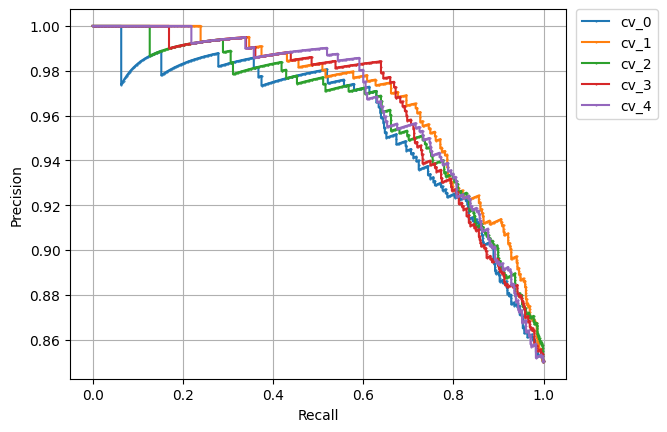

In [2]:
import pandas as pd
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import numpy as np


for i in range(5):
    number = str(i)
    name = "classifier.ResNet152.cv_"+number+".inference.simple"
    path = "../../preds/"+name+".csv"
    df = pd.read_csv(path)

    df_processed = df.filter(items=['ID','RP'])
    df_processed = df_processed.sort_values('ID')

    df_answer = pd.read_csv("../../storage/data_Labels.csv")
    df_answer_processed = df_answer.filter(items=['ID','RP'])
    df_answer_processed = df_answer_processed.sort_values('ID')

    df_probability = pd.merge(df_answer_processed,df_processed, how='left',on =  "ID")
    df_probability.to_csv("auc_"+name+".csv")

    df_list = df_processed["RP"].values.tolist()
    df_answer_list = df_answer_processed["RP"].values.tolist()
    roc = precision_recall_curve(df_answer_list,df_list)
    presicion, recall, thresholds = roc
    print("cv_"+str(i) +":"+ str(average_precision_score(df_answer_list,df_list,average="micro")))
    plt.plot(recall, presicion, marker='.',markersize=1,label="cv_"+str(i))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", borderaxespad=0)
plt.grid()
plt.savefig('presicion_recall_'+name+'.pdf')